In [2]:

%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
df = pd.read_csv("./outputs/dumbbell_CIFAR/exp/CIFAR_acc.csv")
df['Bucketing'] = df['Agg'].apply(lambda x: False)
df['RandomEdge'] = df['Agg'].apply(lambda x: False)

In [6]:
df['Agg'].unique()

array(['Gossip', 'GM', 'MOZI', 'TM', 'SCClip'], dtype=object)

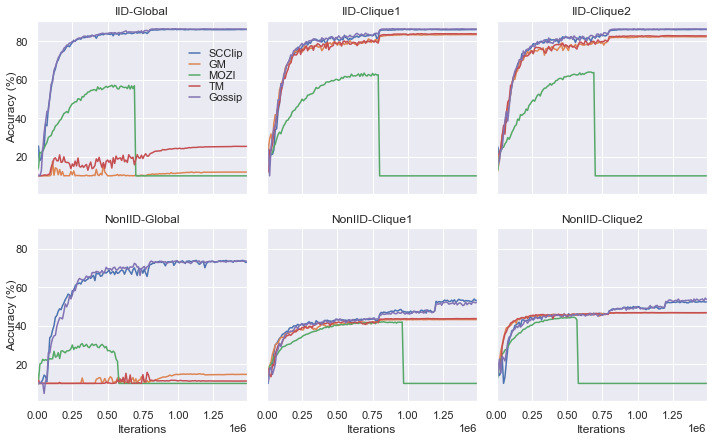

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 2
plt.rcParams["legend.columnspacing"] = 0.5
plt.rcParams["legend.handlelength"] = 1
plt.rcParams["legend.borderaxespad"] = 0
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.frameon"] = False


sns.set()
aggregators = ['SCClip', 'GM', 'MOZI', 'TM', 'Gossip']
colors = sns.color_palette()[:len(aggregators)]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7), sharex=True, sharey=True)

def plot_iid(df, ax, title='IID', legend=False):
    for agg, c in zip(aggregators, colors):
        _df = df[df['Agg'] == agg]
        ax.plot(_df['Iterations'], _df['Accuracy (%)'], color=c, label=agg)

    if legend:
        ax.legend(loc='lower left', bbox_to_anchor=[0.7, 0.5])
    ax.set_xlim(0, 1489851)
    # ax.set_xlabel("Iterations")
    ax.set_title(title)

plot_iid(df[(~df['NonIID']) & (df['Group'] == 'global') ], axes[0][0], title='IID-Global', legend=True)
plot_iid(df[(~df['NonIID']) & (df['Group'] == 'clique 1') ], axes[0][1], title='IID-Clique1')
plot_iid(df[(~df['NonIID']) & (df['Group'] == 'clique 2') ], axes[0][2], title='IID-Clique2')

def plot_noniid(df, ax, title='NonIID'):
    for agg, c in zip(aggregators, colors):
        _df = df[df['Agg'] == agg]
        ax.plot(_df['Iterations'], _df['Accuracy (%)'], color=c, label=agg)
    ax.set_xlim(0, 1489851)
    ax.set_xlabel("Iterations")
    ax.set_title(title)

plot_noniid(df[(df['NonIID']) & (df['Group'] == 'global') ], axes[1][0], title='NonIID-Global')
plot_noniid(df[(df['NonIID']) & (df['Group'] == 'clique 1') ], axes[1][1], title='NonIID-Clique1')
plot_noniid(df[(df['NonIID']) & (df['Group'] == 'clique 2') ], axes[1][2], title='NonIID-Clique2')


# axes[0].set_ylim(45, 100)
# axes[0].set_yticks([50, 60, 70, 80, 90, 100])
axes[0][0].set_ylabel('Accuracy (%)', labelpad=-2)
axes[1][0].set_ylabel('Accuracy (%)', labelpad=-2)
# for i in range(5):
#     axes[i].tick_params(axis='y', which='major', pad=-4)
#     axes[i].tick_params(axis='x', which='major', pad=-2)

fig.subplots_adjust(wspace=0.093)

fig.savefig("./exp_acc_CIFAR.pdf", bbox_inches="tight", dpi=720)
